# Adrian's Notebook

## Imports

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("../data/ITPL_clean.csv", index_col="Date")

## Data Viz

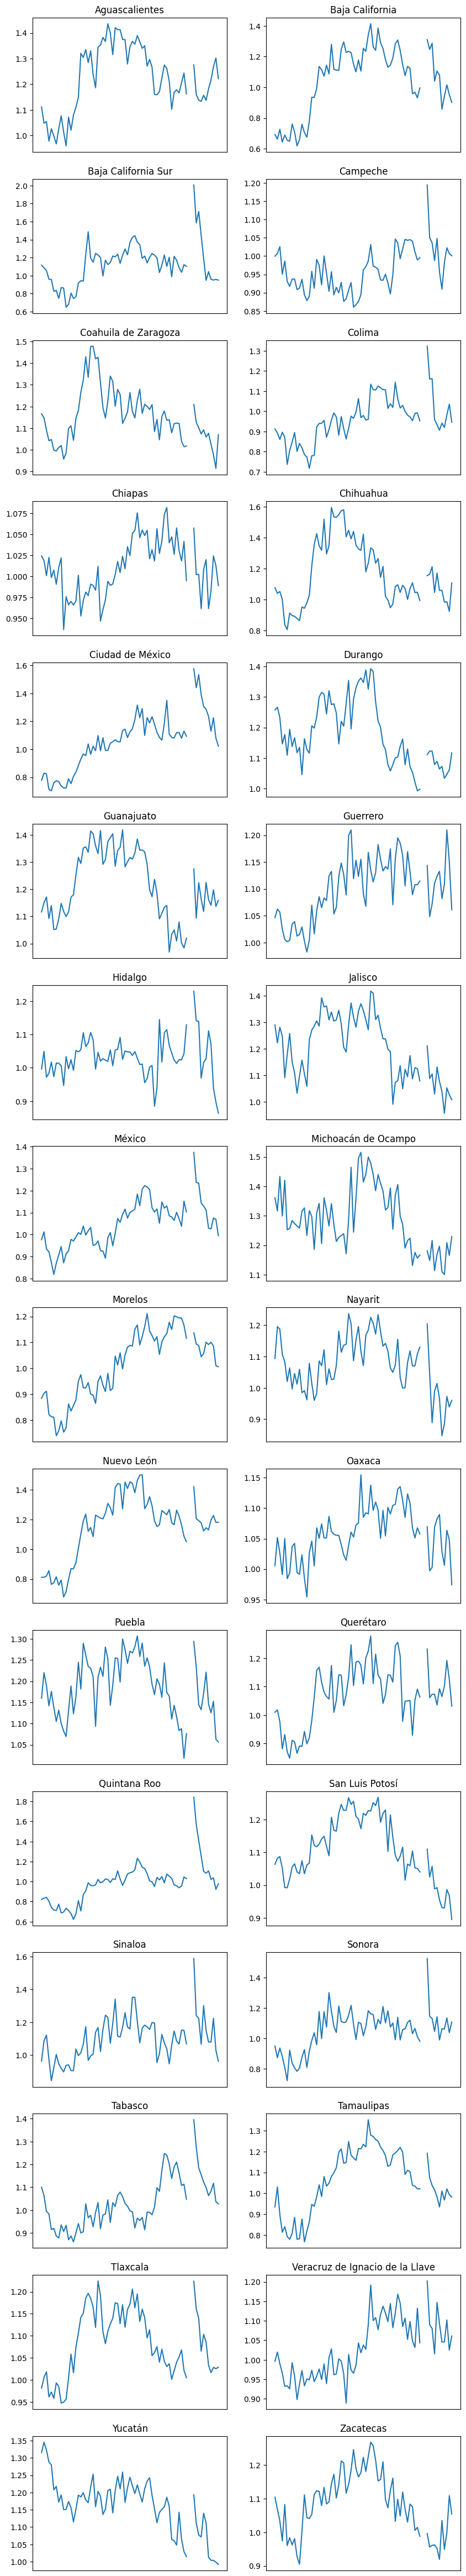

In [9]:
fig, ax = plt.subplots(ncols=2, nrows=16, figsize=(10, 60))
i=0
for row in range(16):
    for col in range(2):
        ax[row, col].plot(df.iloc[:, i])
        ax[row, col].set_title(df.columns[i])
        ax[row, col].xaxis.set_major_formatter(plt.NullFormatter()) # Labels removed for cleaner viz
        ax[row, col].xaxis.set_major_locator(plt.NullLocator()) # Ticks removed for cleaner viz
        i += 1

In [ ]:

def calc_year_over_avg(df, state, quarter):
# function to calculate year-over-year average for a given state and ending
# quarter
    if len(df.loc[:quarter].index.values[-4:])==4:
        return df[state].loc[df.loc[:quarter].index.values[-4:]].mean()
    print("Not enough information to get year-over-year average")

In [12]:
def yearly_rankings(data, start_year=2005, end_year=2023):
    """"THIS FUNCTION RETURNS A DATAFRAME WITH THE YEARLY RANKINGS OF POVERTY BY STATE (AVERAGED ILTP INDEX)
    OVER A SELECTED RANGE OF YEARS (FIRST PLACE HAS HIGHEST POVERTY RATE, LAST PLACE HAS LOWEST.)"""
    rank_df = None
    years = [i for i in range(start_year, end_year + 1)]
    df_start = (start_year - 2005) * 4 
    df_end = (start_year + end_year - 4010 + 1) * 4
    if 2023 in years:
        df_end = 72
    start = df_start
    for i in range((df_end - df_start) // 4):
        end = start + 4
        batch = df.iloc[start:end,:].mean().sort_values(ascending=False)
        rank_series = pd.Series([i + 1 for i in range(len(batch))], index=batch.index).sort_index()
        if rank_df is None:
            rank_df = pd.DataFrame(rank_series).T
        else:
            rank_df.loc[i] = rank_series.to_dict().values()
        start += 4
        if end >= 72:
            break
    if 2023 in years:
        batch_2023 = df.iloc[df_end,:].sort_values(ascending=False)
        rank_2023 = pd.Series([i + 1 for i in range(len(batch_2023))], index=batch_2023.index).sort_index()
        rank_df.loc[len(rank_df)] = rank_2023.to_dict().values()
    rank_df.index = years
    return rank_df


#To transpose the returned table: yearly_rankings(...).T


2017  2018  2019  2020  2021  2022  2023
Aguascalientes                      3     5     1    12    10     1     2
Baja California                     2    10    32     9    12    31    30
Baja California Sur                14     6    12     1     2    28    28
Campeche                           32    26    29    25    26    27    19
Chiapas                            27    25    25    31    28    25    22
Chihuahua                          29    23    19    18    13    26     6
Ciudad de México                    9    15     7     3     1     3    16
Coahuila de Zaragoza               13    11    20    16    20    23     8
Colima                             26    32    31    11    30    29    29
Durango                            18    12    28    26    17    14     5
Guanajuato                         16    30    26    15     5     4     4
Guerrero                           11     7     8    28    14     6    10
Hidalgo                            21    27    18    14    25    21    32
Jalisco                            24    13     9    20    18    20    17
Michoacán de Ocampo                 1     1     3    17     6     5     1
Morelos                            19     4     2    27    22    12    18
México                             17    18    11     8     9    15    20
Nayarit                            23    24    10    24    31    32    27
Nuevo León                          4     2     4     7     8     2     3
Oaxaca                             15    14    17    30    24    16    25
Puebla                              7     8    13    10     7     7    11
Querétaro                           5    28    22    21    23     8    13
Quintana Roo                       31    31    30     2     3    19    24
San Luis Potosí                    20    21    16    29    27    30    31
Sinaloa                            25    22     5     4     4     9    26
Sonora                             28    16    24     5    21    11     7
Tabasco                             8     3     6     6    11    10    15
Tamaulipas                          6     9    23    23    29    24    23
Tlaxcala                           30    29    21    13    16    17    14
Veracruz de Ignacio de la Llave    12    17    14    22    19    13     9
Yucatán                            10    19    15    19    15    22    21
Zacatecas                          22    20    27    32    32    18    12